# 다항 회귀 (Polynomial Regression)

- 입력 데이터를 비선형 변환 후 사용하는 방법
- 모델 자체는 선형 모델

\begin{equation}
\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_1^2 + w_5 x_2^2
\end{equation}

- 차수가 높아질수록 더 복잡한 데이터 학습 가능

## 구현
- 사이킷런은 다항회귀 api 를 제공x
- `PolynomialFeatures` 로 피처들을 변환한뒤, `LinearRegression` 을 순차적으로 적용해야함
- `Pipeline` 을 이용하면 두가지 api 결합을 좀더 깔끔하게 수행가능함

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = X**2 + 2*X + 3 + np.random.normal(0,1, size=(m,1))
y = y.flatten()
print(X.shape, y.shape)

(100, 1) (100,)


In [ ]:
df = pd.DataFrame({"X":X.flatten(), "Y":y})
df.head()

,X,Y
0,0.292881,2.506392
1,1.291136,8.150132
2,0.616580,5.078994
3,0.269299,2.074877
4,-0.458071,3.781939


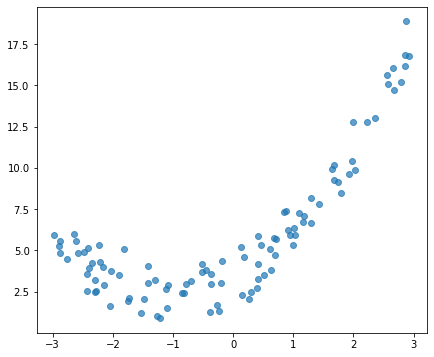

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(X, y, alpha=0.7)
plt.show()

###  Linear model 생성

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lr = LinearRegression()
lr.fit(X, y)
print(lr.coef_, lr.intercept_) # w_0, w_1

[1.78189543] 6.175619278567208


In [ ]:
pred = lr.predict(X)

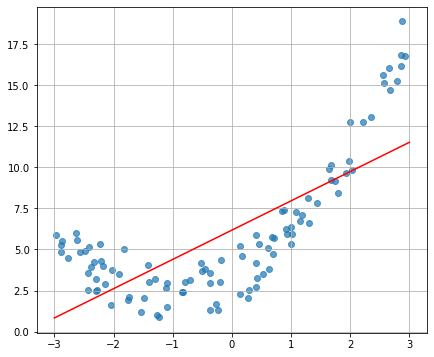

In [ ]:
X_new = np.linspace(-3,3,100).reshape(-1, 1)
pred_new = lr.predict(X_new)

plt.figure(figsize=(7,6))

plt.scatter(X, y, alpha=0.7)
plt.plot(X_new, pred_new, color='red')

plt.grid(True)
plt.show()

### PolynomialFeatures를 이용해 다항회귀구현

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_f = PolynomialFeatures(degree=2,
                            include_bias=False)
X_poly = poly_f.fit_transform(X) # 최고차수가 2차인 Data Set으로 변경

In [ ]:
X.shape, X_poly.shape

((100, 1), (100, 2))

In [ ]:
X[:5]

array([[ 0.29288102],
       [ 1.2911362 ],
       [ 0.61658026],
       [ 0.2692991 ],
       [-0.4580712 ]])

In [ ]:
X_poly[:5]

array([[ 0.29288102,  0.08577929],
       [ 1.2911362 ,  1.66703268],
       [ 0.61658026,  0.38017121],
       [ 0.2692991 ,  0.072522  ],
       [-0.4580712 ,  0.20982923]])

In [ ]:
poly_f.get_feature_names_out()#W_1 과 W_2 의 값이 결정된다. 

array(['x0', 'x0^2'], dtype=object)

In [ ]:
# 최고차항이 2차식이지만 linearregression 을 이용해 학습한다. 대신 fittransform 을 이용해 변경된 데이터를 넣어준다. 
lr2 = LinearRegression()
lr2.fit(X_poly, y)

# real 3 + 2x + x^2
# w0 + w1x w2*x^2
print(lr2.coef_, lr2.intercept_) #W_1 과 W_2, W_0 

[1.97906552 0.94978823] 3.340500756262885


In [ ]:
X_new = np.linspace(-3,3,100).reshape(-1, 1)
X_new_poly = poly_f.transform(X_new)
pred_new2 = lr2.predict(X_new_poly)

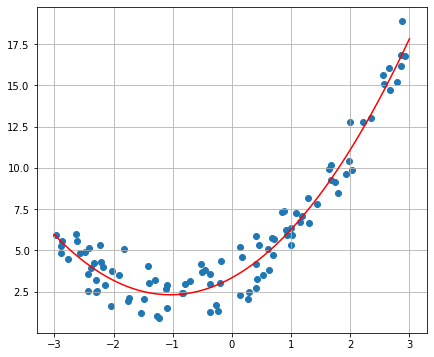

In [ ]:
plt.figure(figsize=(7,6))

plt.scatter(X, y)
plt.plot(X_new, pred_new2, color='red')
plt.grid(True)
plt.show()

### 20 차원

In [ ]:
pnf = PolynomialFeatures(degree=20, include_bias=False)
X_train_poly_20 = pnf.fit_transform(X)
X_train_poly_20.shape, X.shape

((100, 20), (100, 1))

In [ ]:
lr = LinearRegression()
lr.fit(X_train_poly_20, y)

LinearRegression()

In [ ]:
X_new = np.linspace(-3,3,100).reshape(-1, 1)
X_new_poly_20 = pnf.transform(X_new)
pred_new_20 = lr.predict(X_new_poly_20)

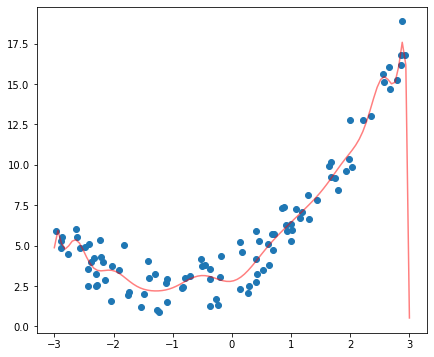

In [ ]:
plt.figure(figsize=(7,6))
plt.scatter(X, y)
plt.plot(X_new, pred_new_20, color='r', alpha=0.5)
plt.show()
# overfitting 이 일어남을 알수 있다. 

In [ ]:
# pipeline 생성
from sklearn.pipeline import make_pipeline

In [ ]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [ ]:
X.shape, y.shape

((100, 1), (100,))

In [ ]:
model.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

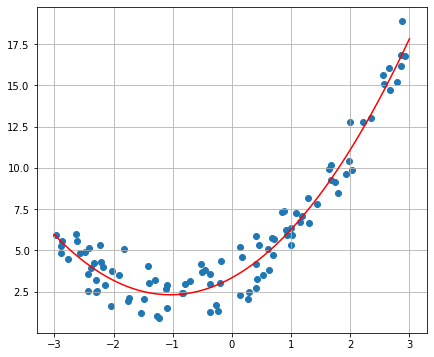

In [ ]:
X_test = np.linspace(-3,3,100).reshape(-1, 1)
X_predict = model.predict(X_test)

plt.figure(figsize=(7,6))
plt.scatter(X, y)
plt.plot(X_test, X_predict, color='red')
plt.grid(True)
plt.show()

# 실습

### 보스턴 주택 가격에 대한 다항 회귀
- 2차 회귀 다항식을 이용하여 주택값을 예측해 보자.
- 예측후 R2 Score 를 확인해 보자

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

x, y = load_boston(return_X_y = True)
x_train, x_test, y_train, y_test = train_test_split(x, y)


c:\Users\KOJUNSUNG\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [33]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)

In [34]:
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [9]:
x_train.shape

(379, 13)

In [35]:
model.fit(x_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [21]:
y_pred=model.predict(x_test)

In [22]:
y_pred

array([34.11608565, 51.67475903, 16.81629455, 49.91788888, 14.65878463,
       44.8754071 , 21.93159389, 26.48986948, 23.53239107, 25.86479771,
       27.39564848, 66.76745296, 16.71478093, 38.06376779, 21.4433589 ,
       34.19295156, 19.79618382,  5.6544652 , 29.36895025, 17.75962961,
       22.26377046, 23.28844166, 13.61617815, 23.35270703, 17.777771  ,
       38.80841684, 24.67034376, 25.49365842, 22.22491539, 21.46011221,
       11.7062043 , 22.32893646, 30.88452017, 22.13354969, 24.98472035,
       66.41785204, 22.05214989, 19.34419203, 16.76983392, 20.86270201,
        8.9332273 , 24.70341265, 18.96970522,  7.15424943, 53.47423816,
       22.27895904, 23.18813539, 31.10358953, 19.55576277, 19.23196661,
       16.37472475, 15.04318178, 43.11608315, 14.58349717, 11.08888018,
       17.87853074, 17.9311738 , 32.04054081, 20.08504176, 62.1173948 ,
       19.00010478, 42.84893155, 40.84935558, 25.72148359, 21.26391912,
       24.78124821, 31.76458979, 21.31396341, 35.26687813, 20.95

In [36]:
model.score(x_train,y_train)

0.8578952048083769

In [37]:
model.score(x_test,y_test)

0.6491865926575329

### 캘리포니아 주택 가격에 대한 다항 회귀

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

x_train, x_test, y_train, y_test = train_test_split(california.data, california.target, test_size = 0.2)

In [38]:
x_train[0] #특성(=feature)이 13개

array([2.81838e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 5.32000e-01,
       5.76200e+00, 4.03000e+01, 4.09830e+00, 2.40000e+01, 6.66000e+02,
       2.02000e+01, 3.92920e+02, 1.04200e+01])

In [44]:
model_2 = make_pipeline(
    PolynomialFeatures(degree = 2),
    StandardScaler(),
    LinearRegression()
)
model_2.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [45]:
print(f'Train Data Score : {model_2.score(x_train, y_train)}')
print(f'Test Data Score : {model_2.score(x_test, y_test)}')

Train Data Score : 0.8578952048083769
Test Data Score : 0.6491865926575329


In [39]:
def plot_california_prices(expected, predicted):
  plt.figure(figsize = (8, 4))
  plt.scatter(expected, predicted)
  plt.plot([0, 5], [0, 5], '--r') 
  plt.xlabel('True price ($100,000s)')
  plt.ylabel('Predicted pirce ($100,000s)')
  plt.tight_layout()

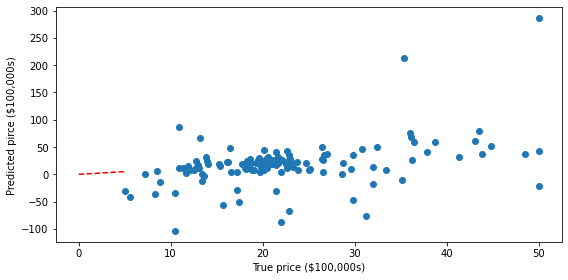

In [42]:
predicted = model_2.predict(x_test)
expected = y_test
plot_california_prices(expected, predicted)